In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Financial Econometrics Project/Return Volatilities

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Financial Econometrics Project/Return Volatilities


In [ ]:
bank_data = pd.read_csv('FinEconBankData.csv')
bank_data.head()

,rssdid,year,FedDistrict,ShortName,Assets2170r,permco,ticker,dPublic,bank_meanAssets
0,1025309,2006,12,bank of hi corp,11.393465,589,BOH,1,12.613256
1,1025309,2007,12,bank of hi corp,10.849381,589,BOH,1,12.613256
2,1025309,2008,12,bank of hi corp,10.975214,589,BOH,1,12.613256
3,1025309,2009,12,bank of hi corp,12.473489,589,BOH,1,12.613256
4,1025309,2010,12,bank of hi corp,13.063506,589,BOH,1,12.613256


In [ ]:
bank_mean_assets = bank_data.groupby('ticker').agg({'bank_meanAssets':'first'}).reset_index()
bank_mean_assets.sort_values('bank_meanAssets',ascending=False,inplace=True)

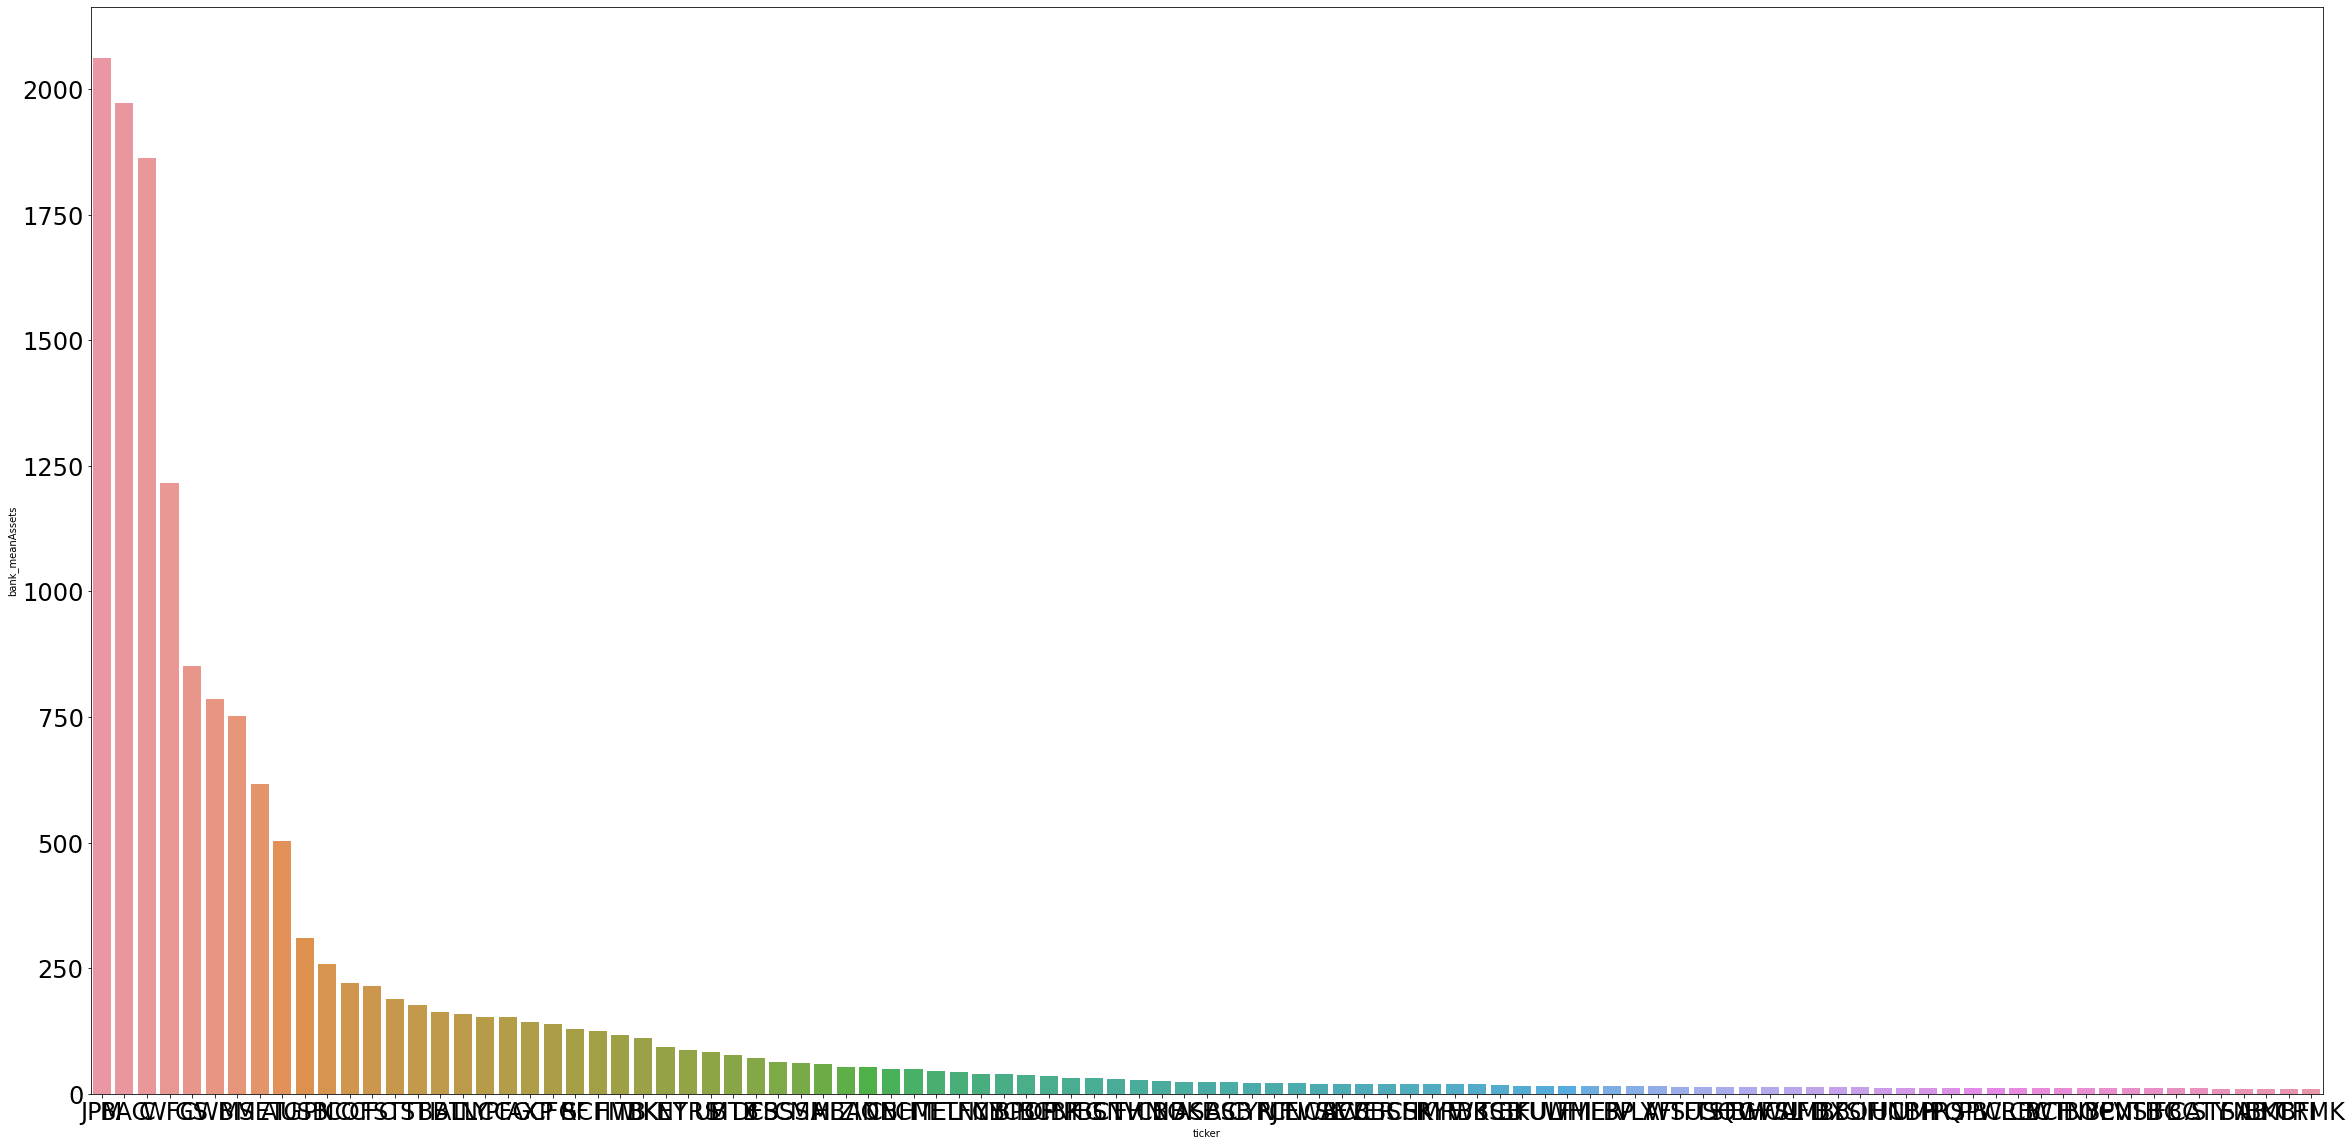

In [ ]:
plt.figure(figsize=(40,20))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
sns.barplot(x='ticker',y='bank_meanAssets',data=bank_mean_assets)

In [ ]:
bank_mean_assets['large_dummy'] = bank_mean_assets['bank_meanAssets'].apply(lambda x: 1 if x > 250 else 0)

In [ ]:
arch_vol = pd.read_csv('arch_daily_vola_tbl.csv').dropna(axis=1)
garch_vol = pd.read_csv('garch_daily_vola_tbl.csv').dropna(axis=1)
argarch_vol = pd.read_csv('argarch_daily_vola_tbl.csv').dropna(axis=1)

In [ ]:
if 'Date' in arch_vol.columns:
  arch_vol.Date = pd.to_datetime(arch_vol.Date)
  arch_vol.set_index('Date',inplace=True)

  garch_vol.Date = pd.to_datetime(garch_vol.Date)
  garch_vol.set_index('Date',inplace=True)

  argarch_vol.Date = pd.to_datetime(argarch_vol.Date)
  argarch_vol.set_index('Date',inplace=True)

In [ ]:
arch_vol['month'] = arch_vol.index.month
garch_vol['month'] = garch_vol.index.month
argarch_vol['month'] = argarch_vol.index.month

def month_to_quarter(month):
  if month in [1,2,3]:
    i = 1
  elif month in [4,5,6]:
    i = 2
  elif month in [7,8,9]:
    i = 3
  else:
    i = 4
  return i

arch_vol['quarter'] = arch_vol['month'].apply(month_to_quarter)
garch_vol['quarter'] = garch_vol['month'].apply(month_to_quarter)
argarch_vol['quarter'] = argarch_vol['month'].apply(month_to_quarter)

arch_vol = arch_vol.groupby([arch_vol.index.year,arch_vol.quarter]).agg('mean').drop(columns='month',errors='ignore').reset_index()
garch_vol = garch_vol.groupby([garch_vol.index.year,garch_vol.quarter]).agg('mean').drop(columns='month',errors='ignore').reset_index()
argarch_vol = argarch_vol.groupby([argarch_vol.index.year,argarch_vol.quarter]).agg('mean').drop(columns='month',errors='ignore').reset_index()

arch_vol['time'] = arch_vol.index
arch_vol.set_index(['Date','quarter','time'],inplace=True)

garch_vol['time'] = garch_vol.index
garch_vol.set_index(['Date','quarter','time'],inplace=True)

argarch_vol['time'] = argarch_vol.index
argarch_vol.set_index(['Date','quarter','time'],inplace=True)

In [ ]:
arch_panel = arch_vol.unstack(level=['quarter','Date','time']).reset_index()
garch_panel = garch_vol.unstack(level=['quarter','Date','time']).reset_index()
argarch_panel = argarch_vol.unstack(level=['quarter','Date','time']).reset_index()

In [ ]:
arch_panel.columns = ['ticker','quarter','year','time','vol']
garch_panel.columns = ['ticker','quarter','year','time','vol']
argarch_panel.columns = ['ticker','quarter','year','time','vol']

In [ ]:
pd.set_option('display.max_rows',500)
arch_panel.tail(500)

,ticker,quarter,year,time,vol
2060,TRMK,1,2011,20,0.000296
2061,TRMK,2,2011,21,0.000168
2062,TRMK,3,2011,22,0.000761
2063,TRMK,4,2011,23,0.001106
2064,TRMK,1,2012,24,0.000280
2065,TRMK,2,2012,25,0.000296
2066,TRMK,3,2012,26,0.000175
2067,TRMK,4,2012,27,0.000221
2068,TRMK,1,2013,28,0.000207
2069,TRMK,2,2013,29,0.000233


In [ ]:
arch_panel.drop(columns=['quarter','year'],errors='ignore',inplace=True)
garch_panel.drop(columns=['quarter','year'],errors='ignore',inplace=True)
argarch_panel.drop(columns=['quarter','year'],errors='ignore',inplace=True)

In [ ]:
large_dummies = bank_mean_assets.drop(columns='bank_meanAssets')

arch_panel = pd.merge(arch_panel, large_dummies,how='left',on='ticker').dropna()
garch_panel = pd.merge(garch_panel, large_dummies,how='left',on='ticker').dropna()
argarch_panel = pd.merge(argarch_panel, large_dummies,how='left',on='ticker').dropna()

In [ ]:
arch_panel['dodd_frank_dummy'] = arch_panel['time'].apply(lambda x: 1 if x >= 20 else 0)
garch_panel['dodd_frank_dummy'] = garch_panel['time'].apply(lambda x: 1 if x >= 20 else 0)
argarch_panel['dodd_frank_dummy'] = argarch_panel['time'].apply(lambda x: 1 if x >= 20 else 0)

In [ ]:
arch_panel

,ticker,time,vol,large_dummy,dodd_frank_dummy
0,AIG,0,0.000637,1.0,0
1,AIG,1,0.000176,1.0,0
2,AIG,2,0.000119,1.0,0
3,AIG,3,0.000088,1.0,0
4,AIG,4,0.000124,1.0,0
...,...,...,...,...,...
2475,ZION,35,0.000263,0.0,1
2476,ZION,36,0.000404,0.0,1
2477,ZION,37,0.000257,0.0,1
2478,ZION,38,0.000463,0.0,1


In [ ]:
argarch_panel

,ticker,time,vol,large_dummy,dodd_frank_dummy
0,AIG,0,0.000457,1.0,0
1,AIG,1,0.000132,1.0,0
2,AIG,2,0.000090,1.0,0
3,AIG,3,0.000064,1.0,0
4,AIG,4,0.000087,1.0,0
...,...,...,...,...,...
2475,ZION,35,0.000206,0.0,1
2476,ZION,36,0.000345,0.0,1
2477,ZION,37,0.000224,0.0,1
2478,ZION,38,0.000381,0.0,1
